In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("pdf", fonttype=42)

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

def plot_fault_block(smps,save=False,filename=None,mda=True,**kwargs):
    
    nplots = len(smps)
    height = nplots*1.5
    
    
    if len(smps)==1:
        fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height))
        smp = smps[0]
        smp.kde(ax=axs,**kwargs)
        axs.set_title(smp.name)
        axs.set_xlim(50,4000)

        if mda:
            mda_text = 'MDA: ' + str(round(smp.mda,1)) + ' ± ' + str(round(smp.mda_err,1))
            axs.text(0.02,0.3,mda_text,transform=axs.transAxes)
            ysg_text = 'YSG: ' + str(round(smp.ysg,1)) + ' ± ' + str(round(smp.ysg_err,1))
            axs.text(0.02,0.1,ysg_text,transform=axs.transAxes)
    
    else:
        fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height),sharex=True)
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k],**kwargs)
            axs[k].set_title(smp.name)
            axs[k].set_xlim(50,4000)
            
            if mda:
                mda_text = 'MDA: ' + str(round(smp.mda,1)) + ' ± ' + str(round(smp.mda_err,1))
                axs[k].text(0.02,0.3,mda_text,transform=axs[k].transAxes)
                ysg_text = 'YSG: ' + str(round(smp.ysg,1)) + ' ± ' + str(round(smp.ysg_err,1))
                axs[k].text(0.02,0.1,ysg_text,transform=axs[k].transAxes)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

In [2]:
nickname_dic = {'CT15076':'KZ1','CT15082':'KZ2','CT15092':'KZ3','CT15099':'KZ4','CT15127':'KZ5','CT15113':'KZ6','AB0913':'RU1','CT130918-2A':'SV1',
'100211-9A':'SV2','CT130918-9A':'SV3','CT130919-5A':'SV4','100411-5':'SV5','CT130919-8A':'SV6','AB0926':'SV7','100211-1A':'SV8'}

for smp in samples:
    if smp.name in nickname_dic:
        smp.original = smp.name
        smp.name = nickname_dic[smp.name]
        print(smp.name,smp.original)



KZ1 CT15076
SV8 100211-1A
SV5 100411-5
KZ3 CT15092
SV1 CT130918-2A
SV2 100211-9A
KZ4 CT15099
SV3 CT130918-9A
SV4 CT130919-5A
KZ2 CT15082
RU1 AB0913
SV7 AB0926
SV6 CT130919-8A
KZ5 CT15127
KZ6 CT15113


In [3]:
# Block out and sort

kz_samples = [smp for smp in samples if 'KZ' in smp.name]
kz_samples.sort(key=lambda x: x.name, reverse=True)
sv_samples = [smp for smp in samples if 'SV' in smp.name]
sv_samples.sort(key=lambda x: x.name, reverse=True)

In [4]:
# Color Svaneti samples
for smp in sv_samples:
    if smp.name=='SV1':
        smp.color='red'
    elif smp.name in ['SV2','SV3']:
        smp.color='purple'
    elif smp.name in ['SV7']:
        smp.color='skyblue'

# Color Kazbegi samples
for smp in kz_samples:
    if smp.name=='KZ1':
        smp.color='skyblue'

In [5]:
# Get single-grain MDAs

for smp in sv_samples:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]

for smp in kz_samples:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]



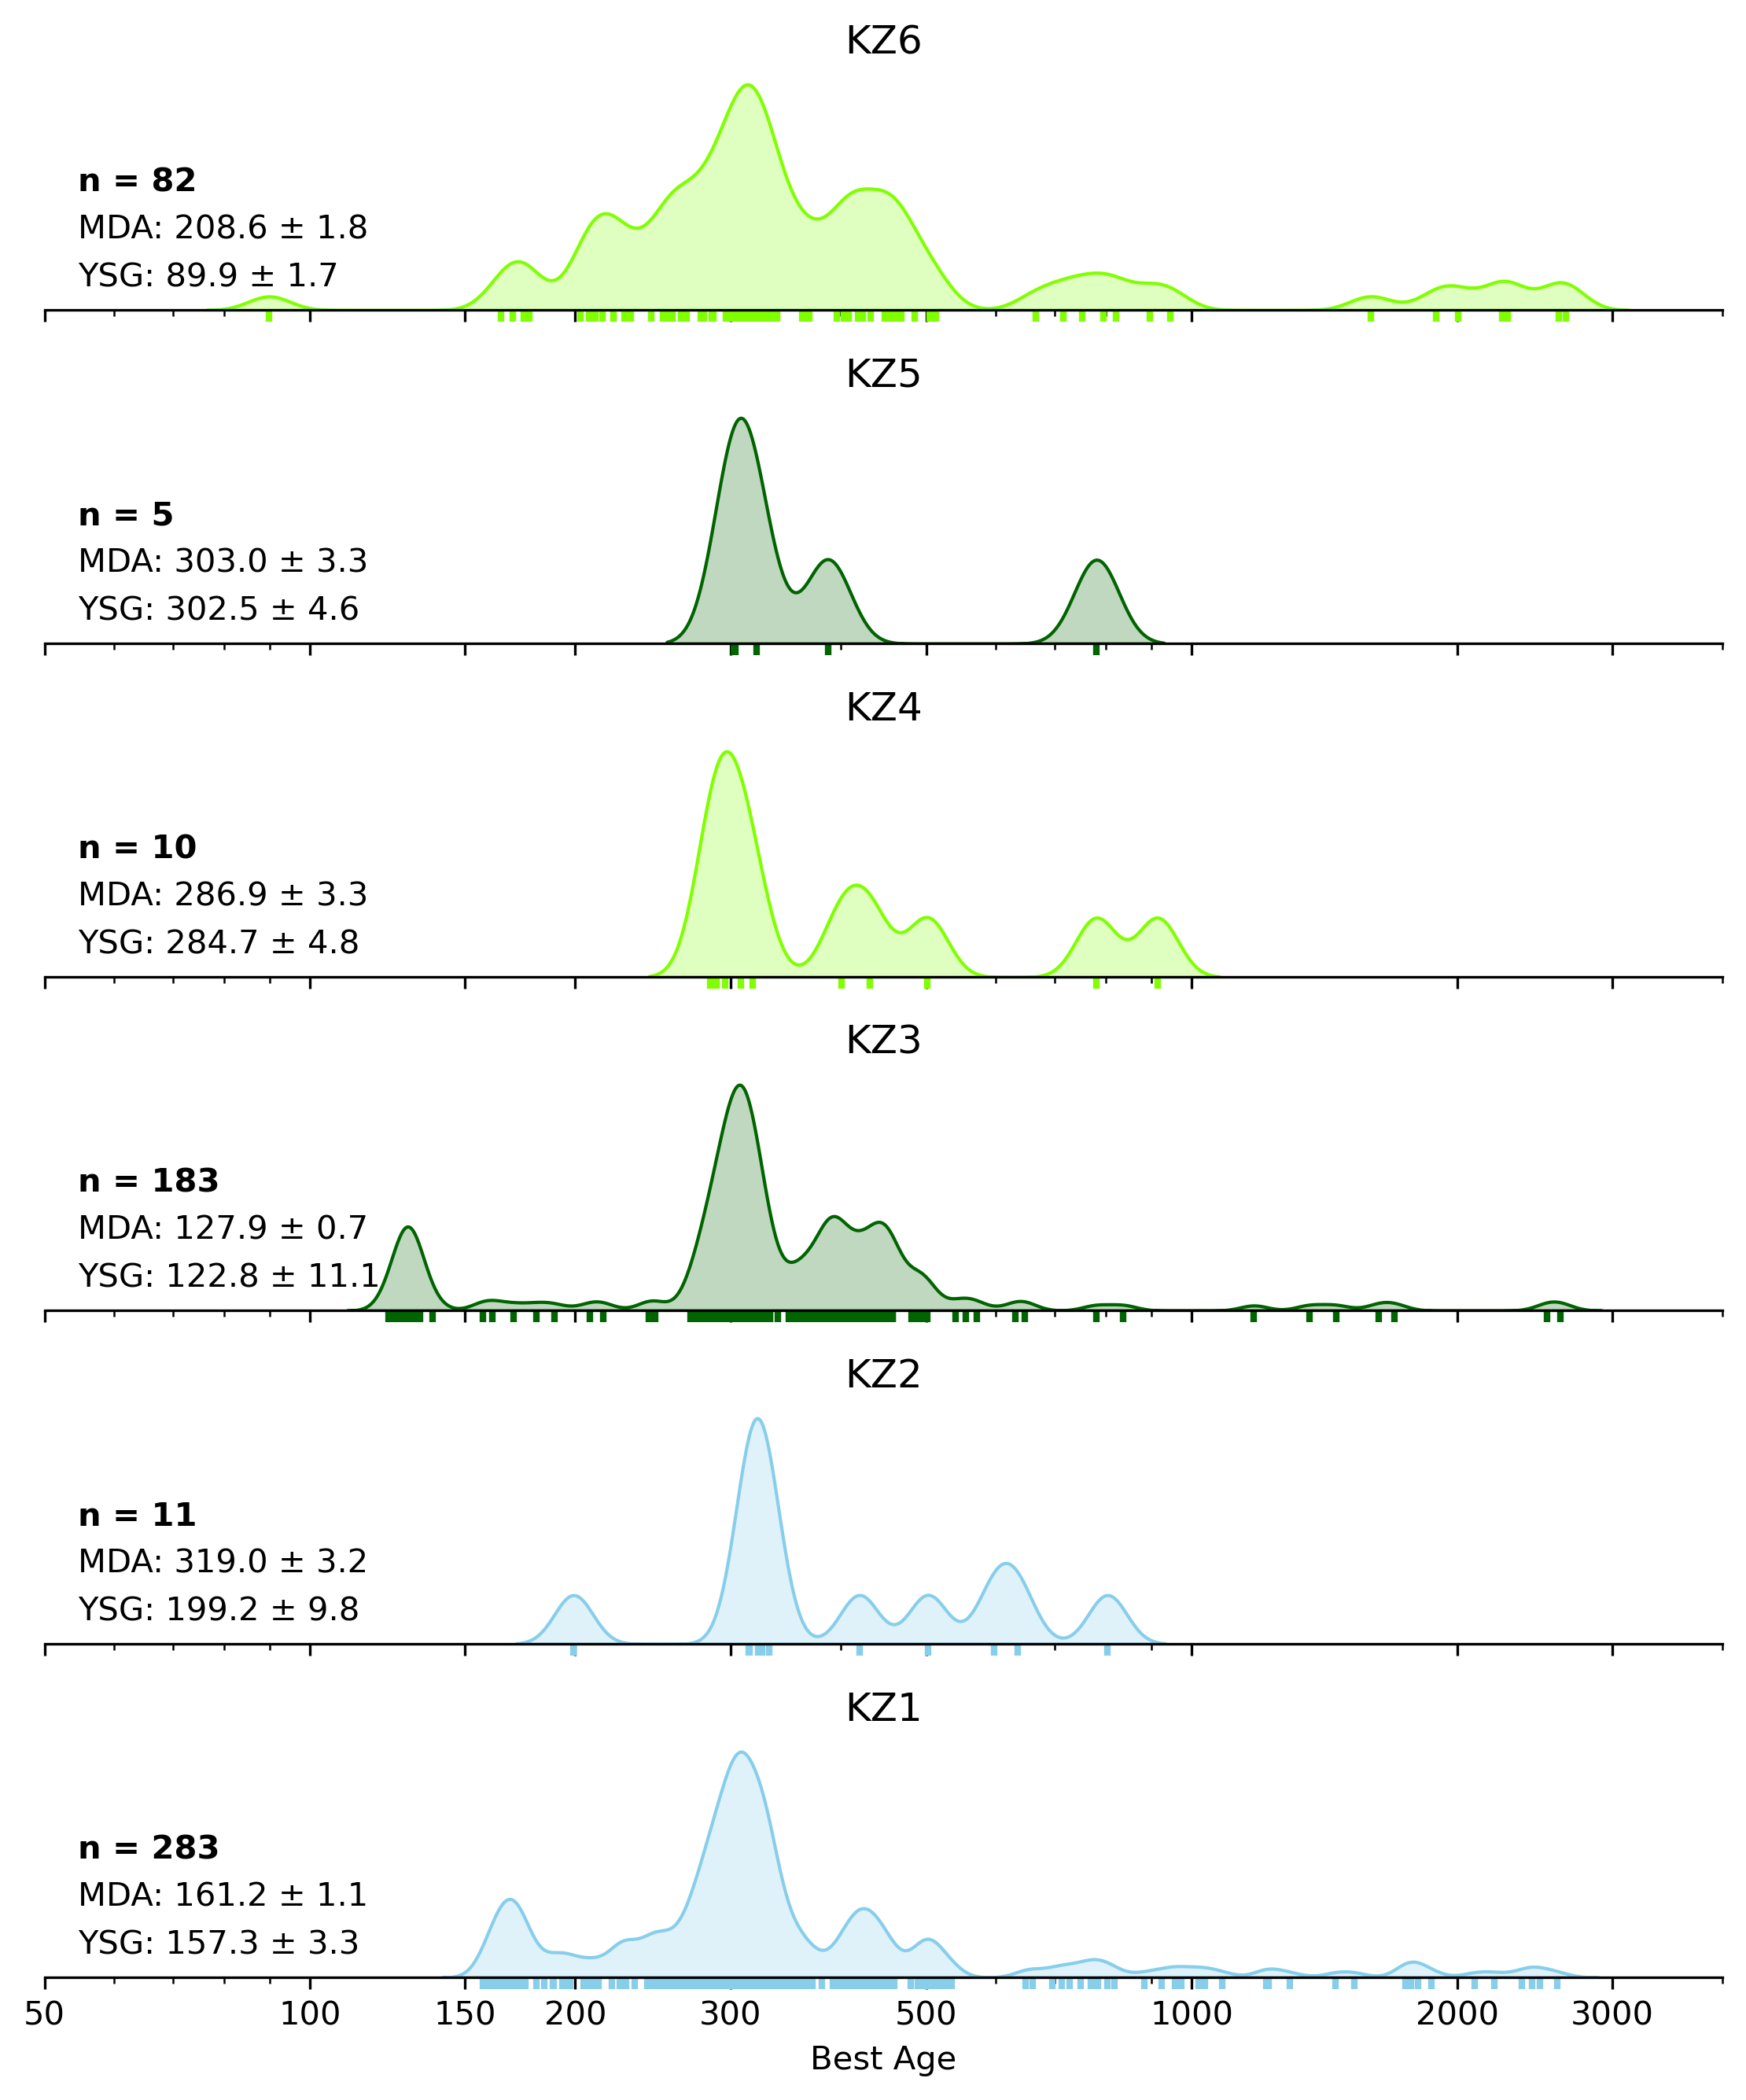

In [6]:
ticks = [50,100,150,200,300,500,1000,2000,3000]

# Plot KZ
plot_fault_block(kz_samples,save=True,filename='kz.pdf',method=None,bw_adjust=0.2,ticks=ticks)

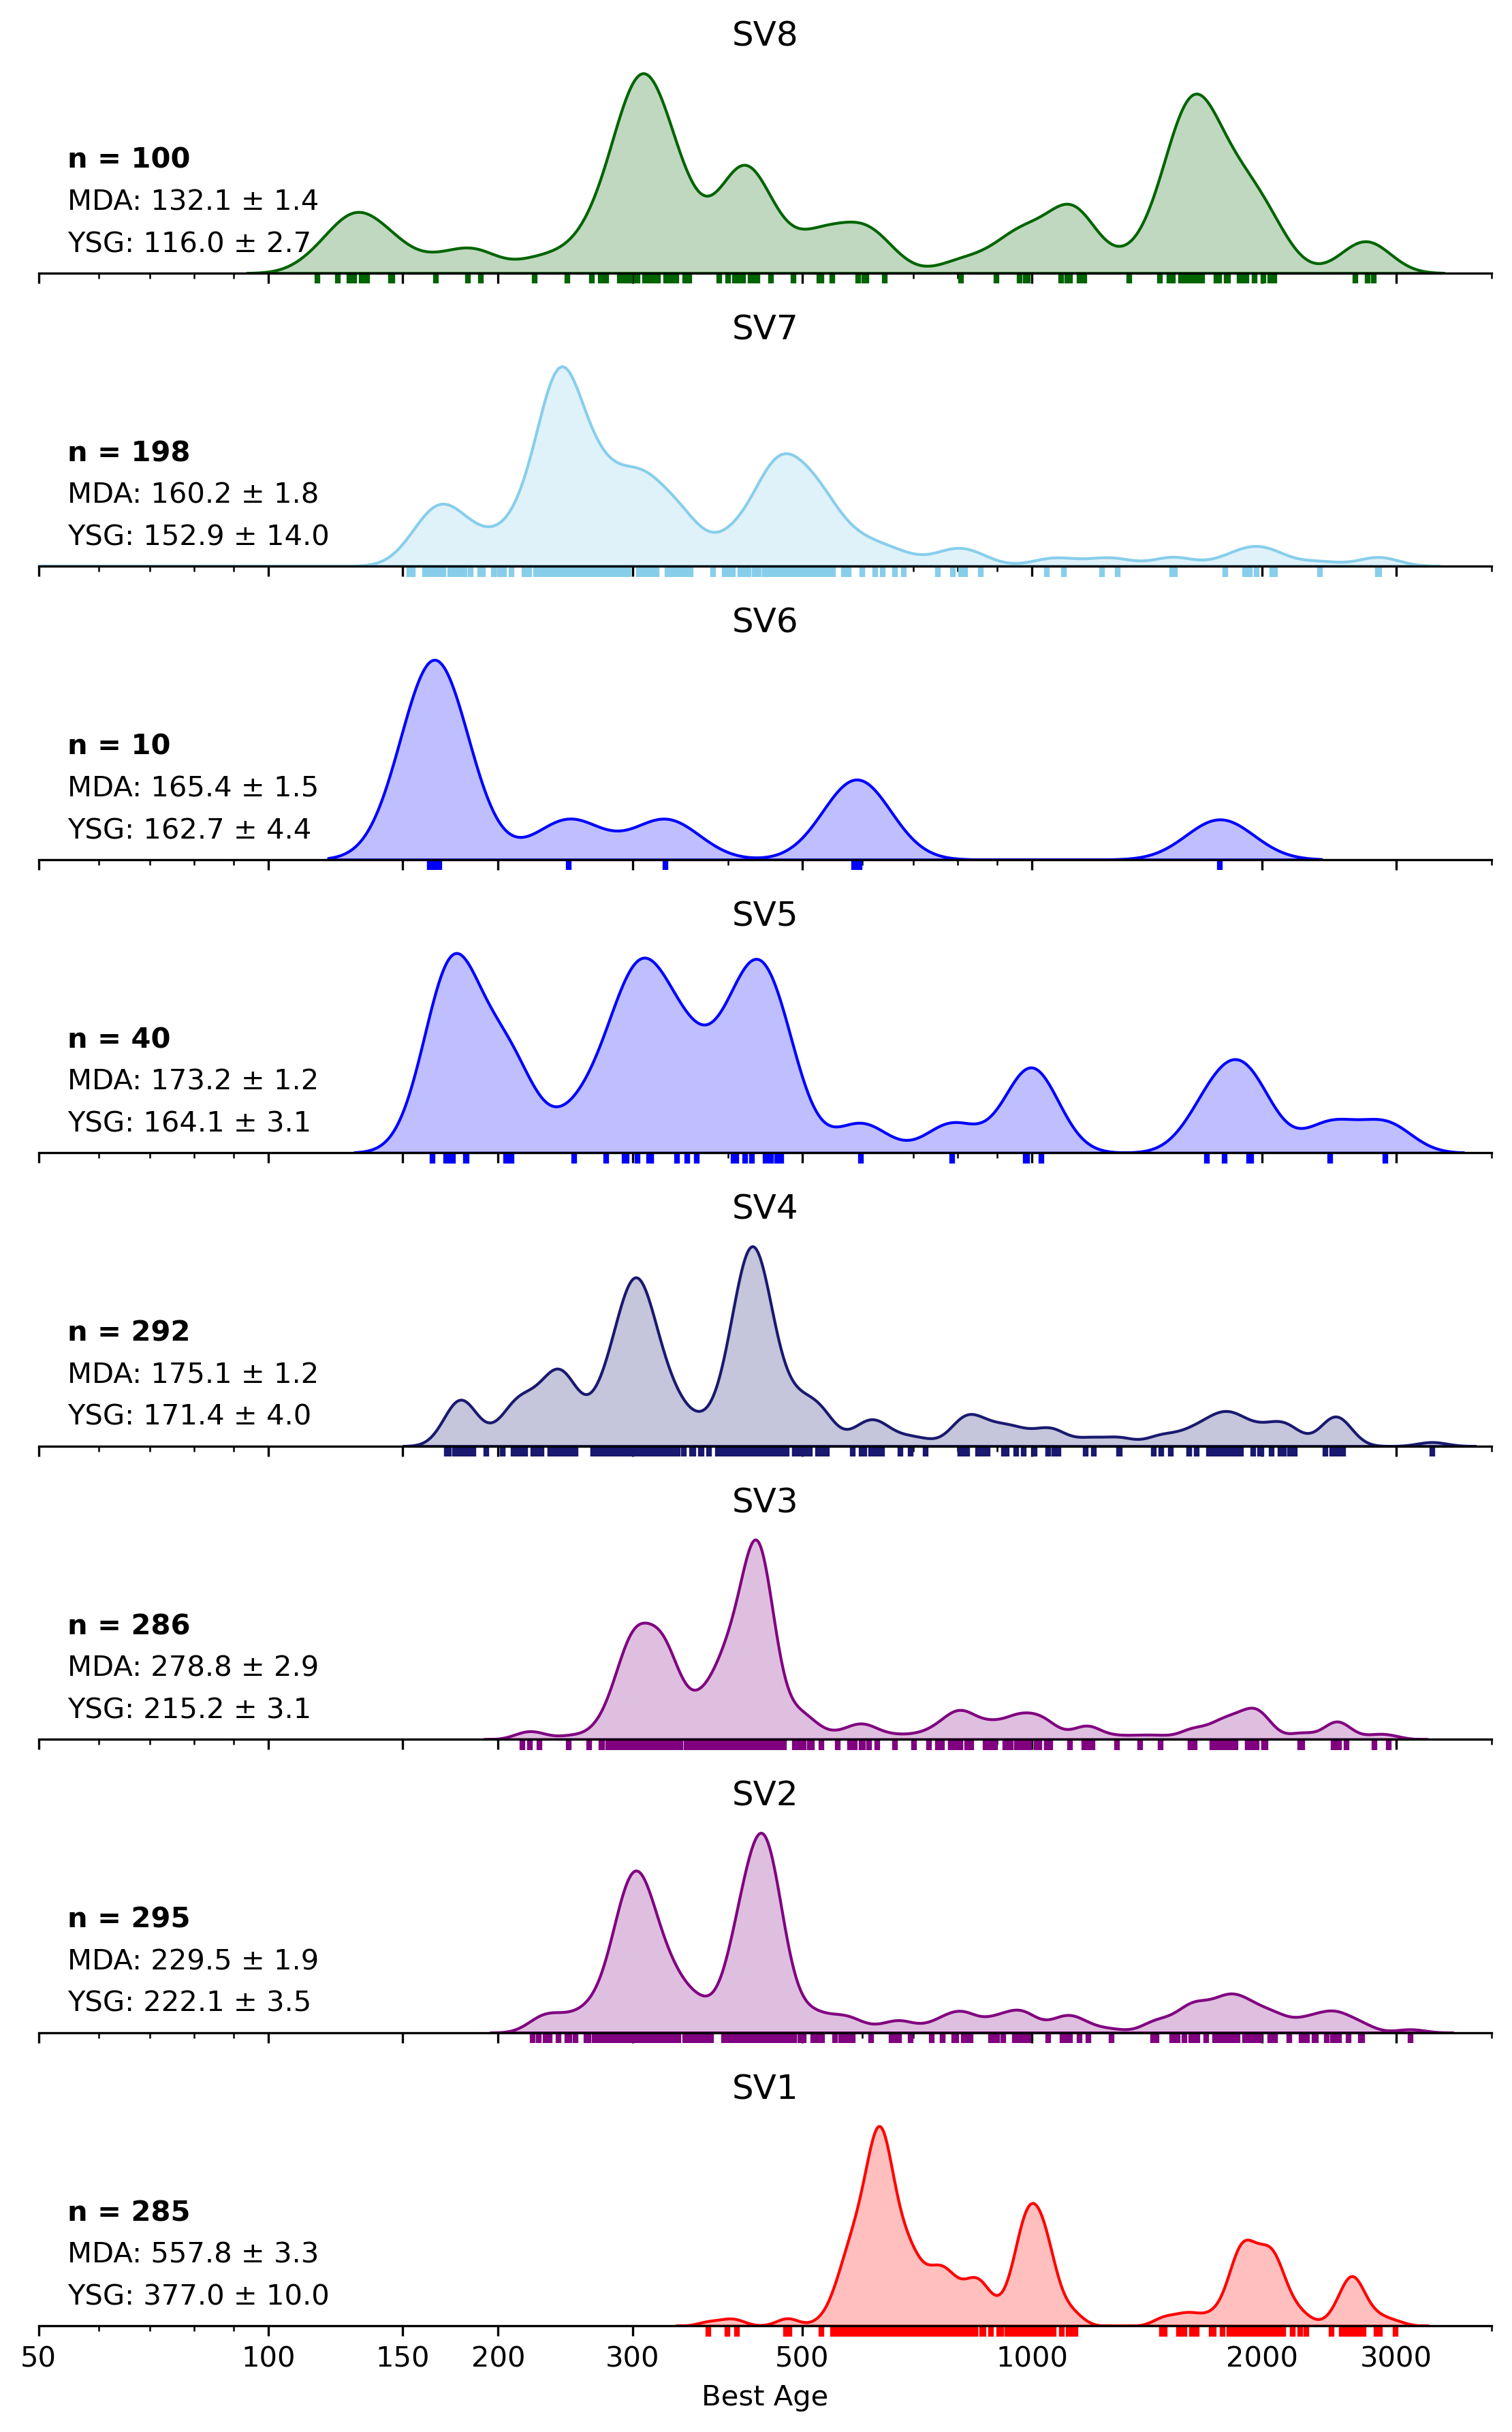

In [7]:
# Plot SV
plot_fault_block(sv_samples,save=True,filename='sv.pdf',method=None,bw_adjust=0.2,ticks=ticks)

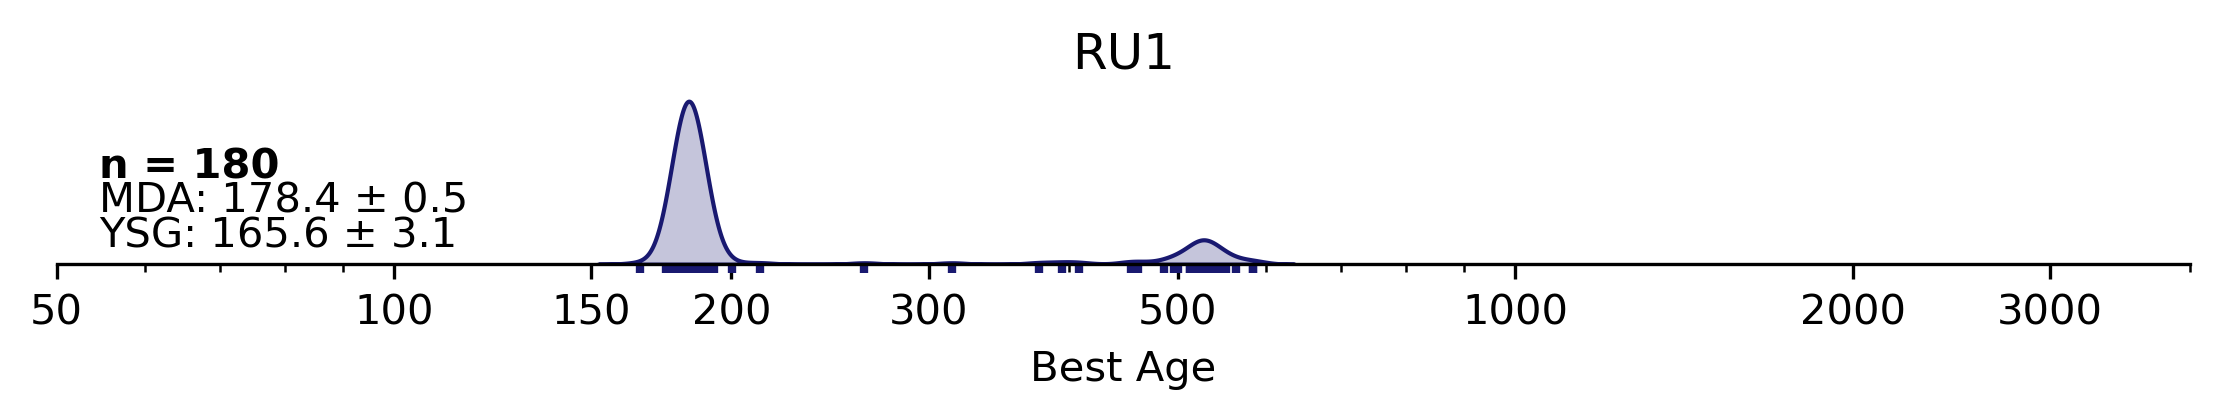

In [8]:
# Plot RU
ru = [smp for smp in samples if 'RU' in smp.name]

for smp in ru:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')    
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]

plot_fault_block(ru,save=True,filename='ru.pdf',method=None,bw_adjust=0.2,ticks=ticks)

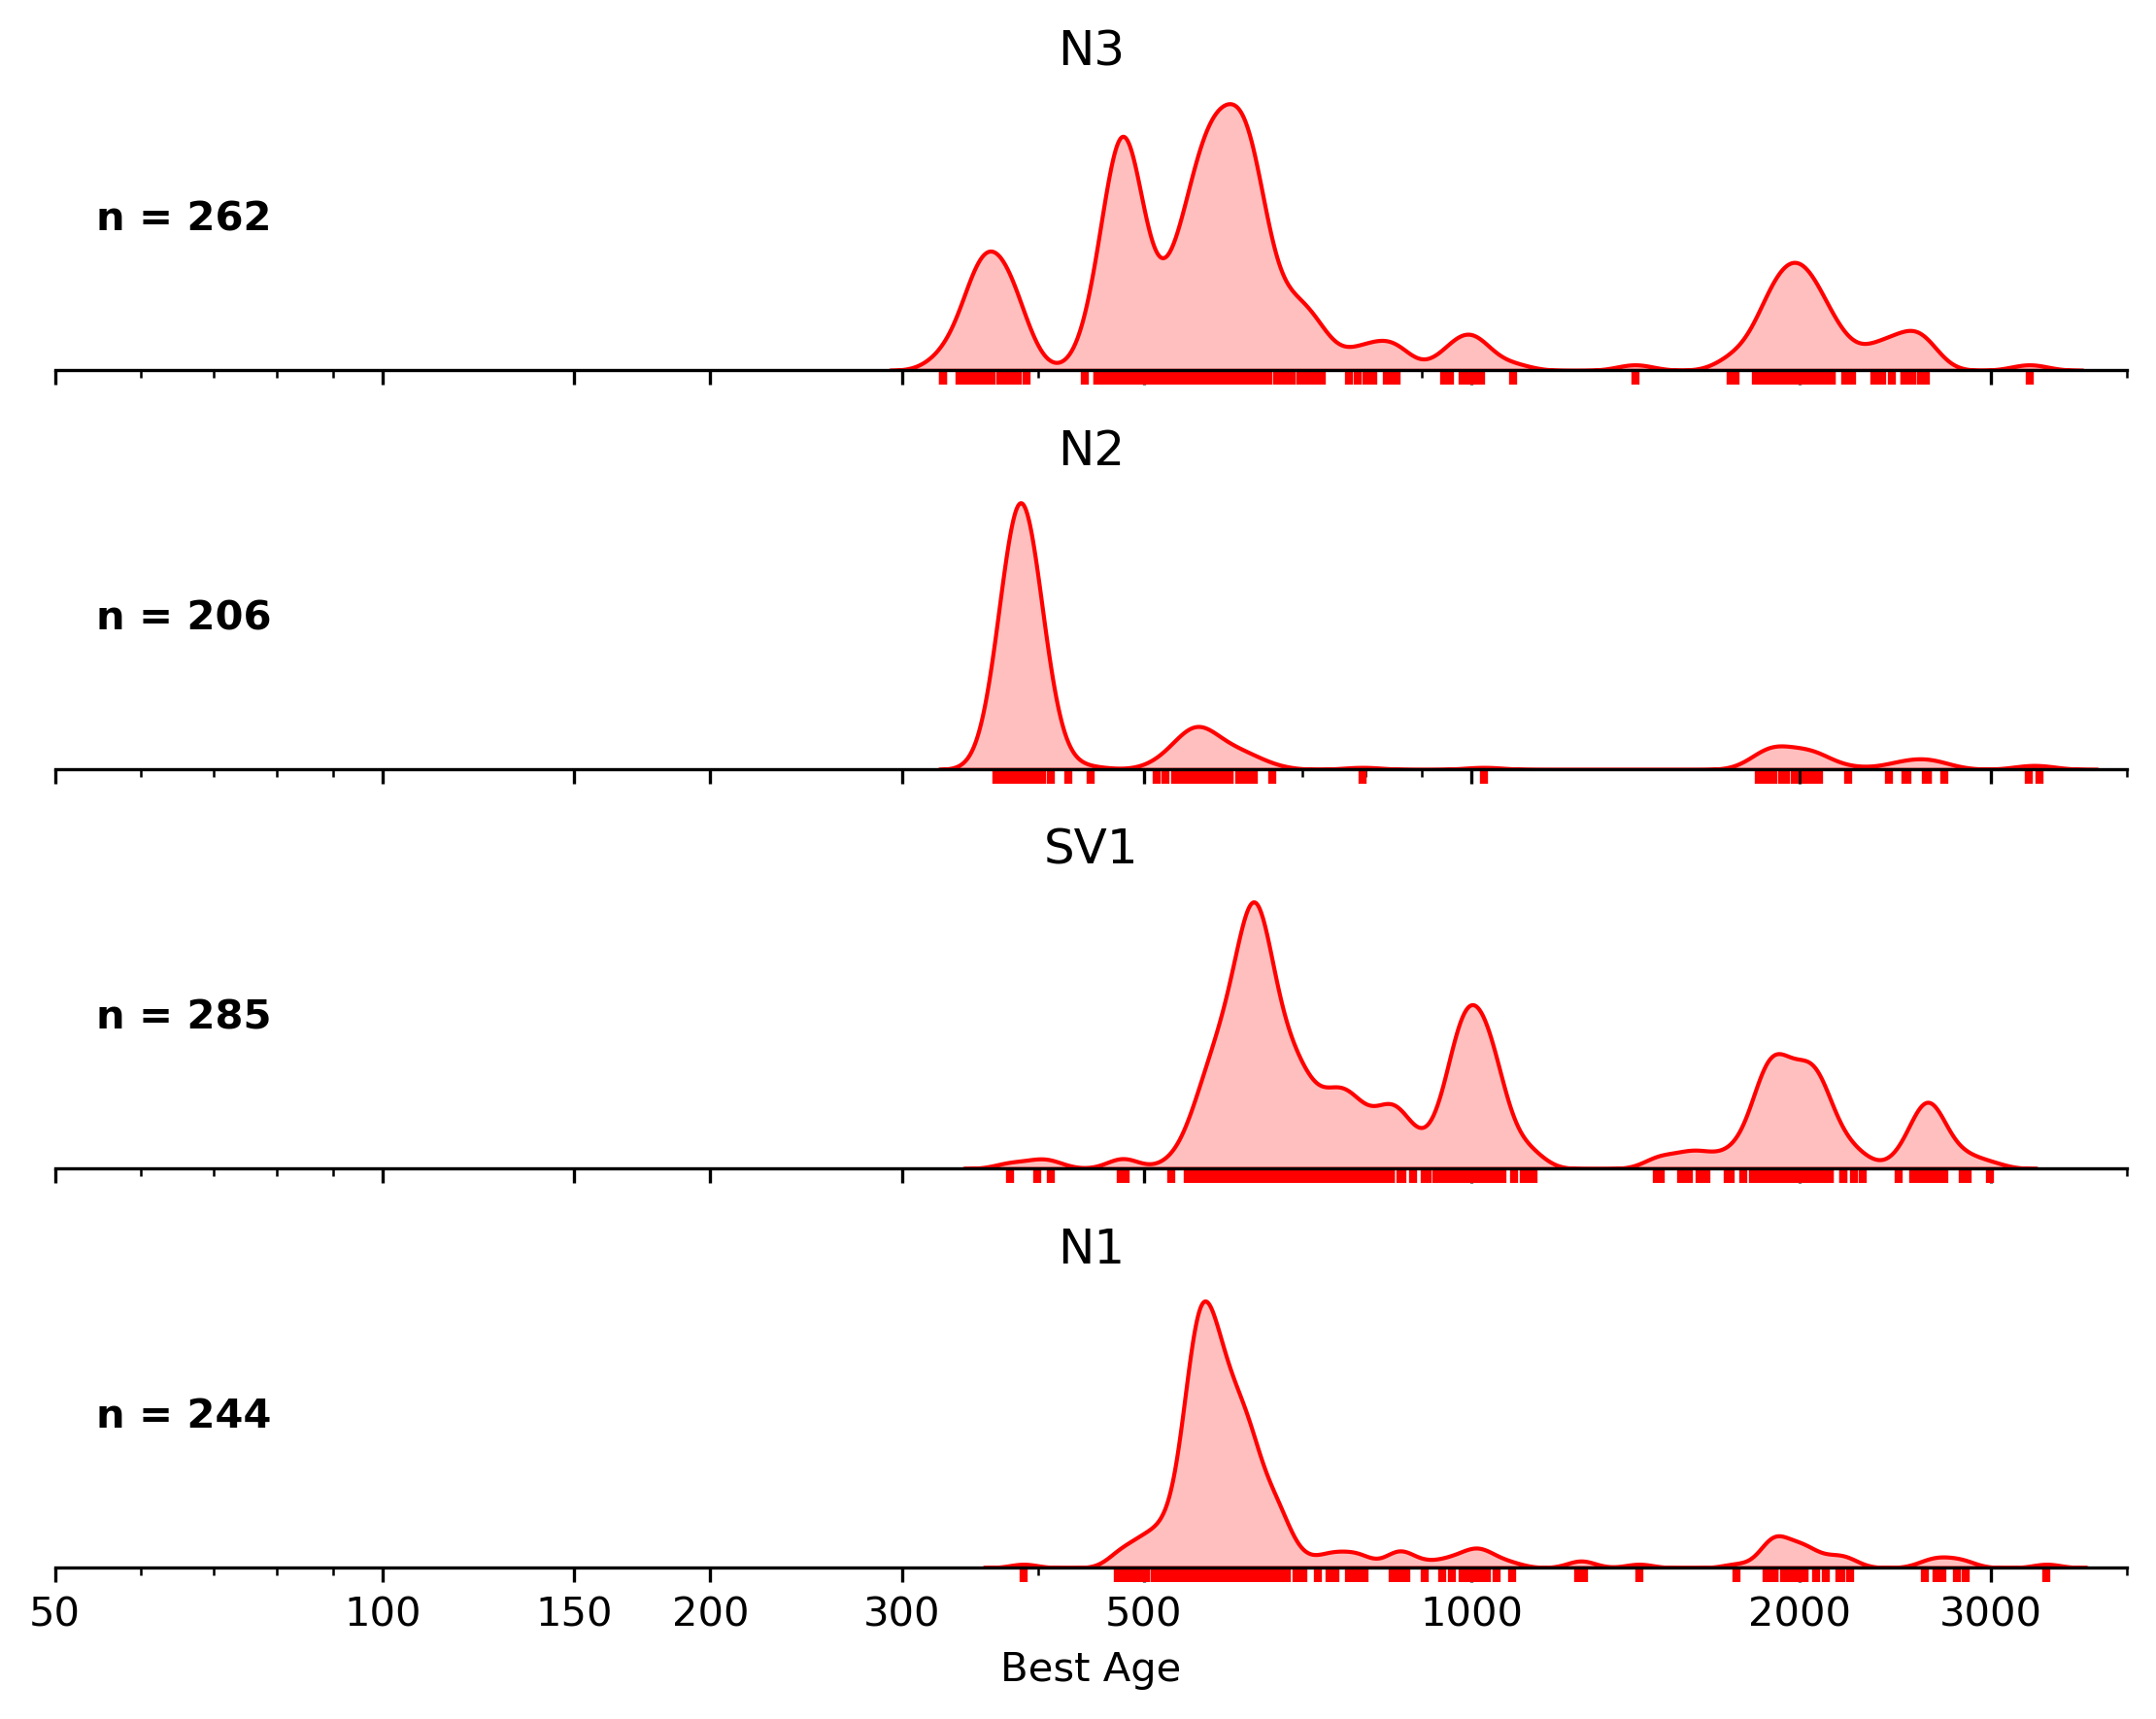

In [9]:
# Pz samples
pz1 = [smp for smp in sv_samples if smp.name=='SV1']
pz2 = [smp for smp in samples_published if smp.name in ['N1','N2','N3']]
pz = pz1+pz2

pz.sort(key=lambda x: np.min(x.bestage))

for smp in pz:
    smp.color='red'
plot_fault_block(pz,save=True,filename='pz.pdf',method=None,mda=False,bw_adjust=0.2,ticks=ticks)

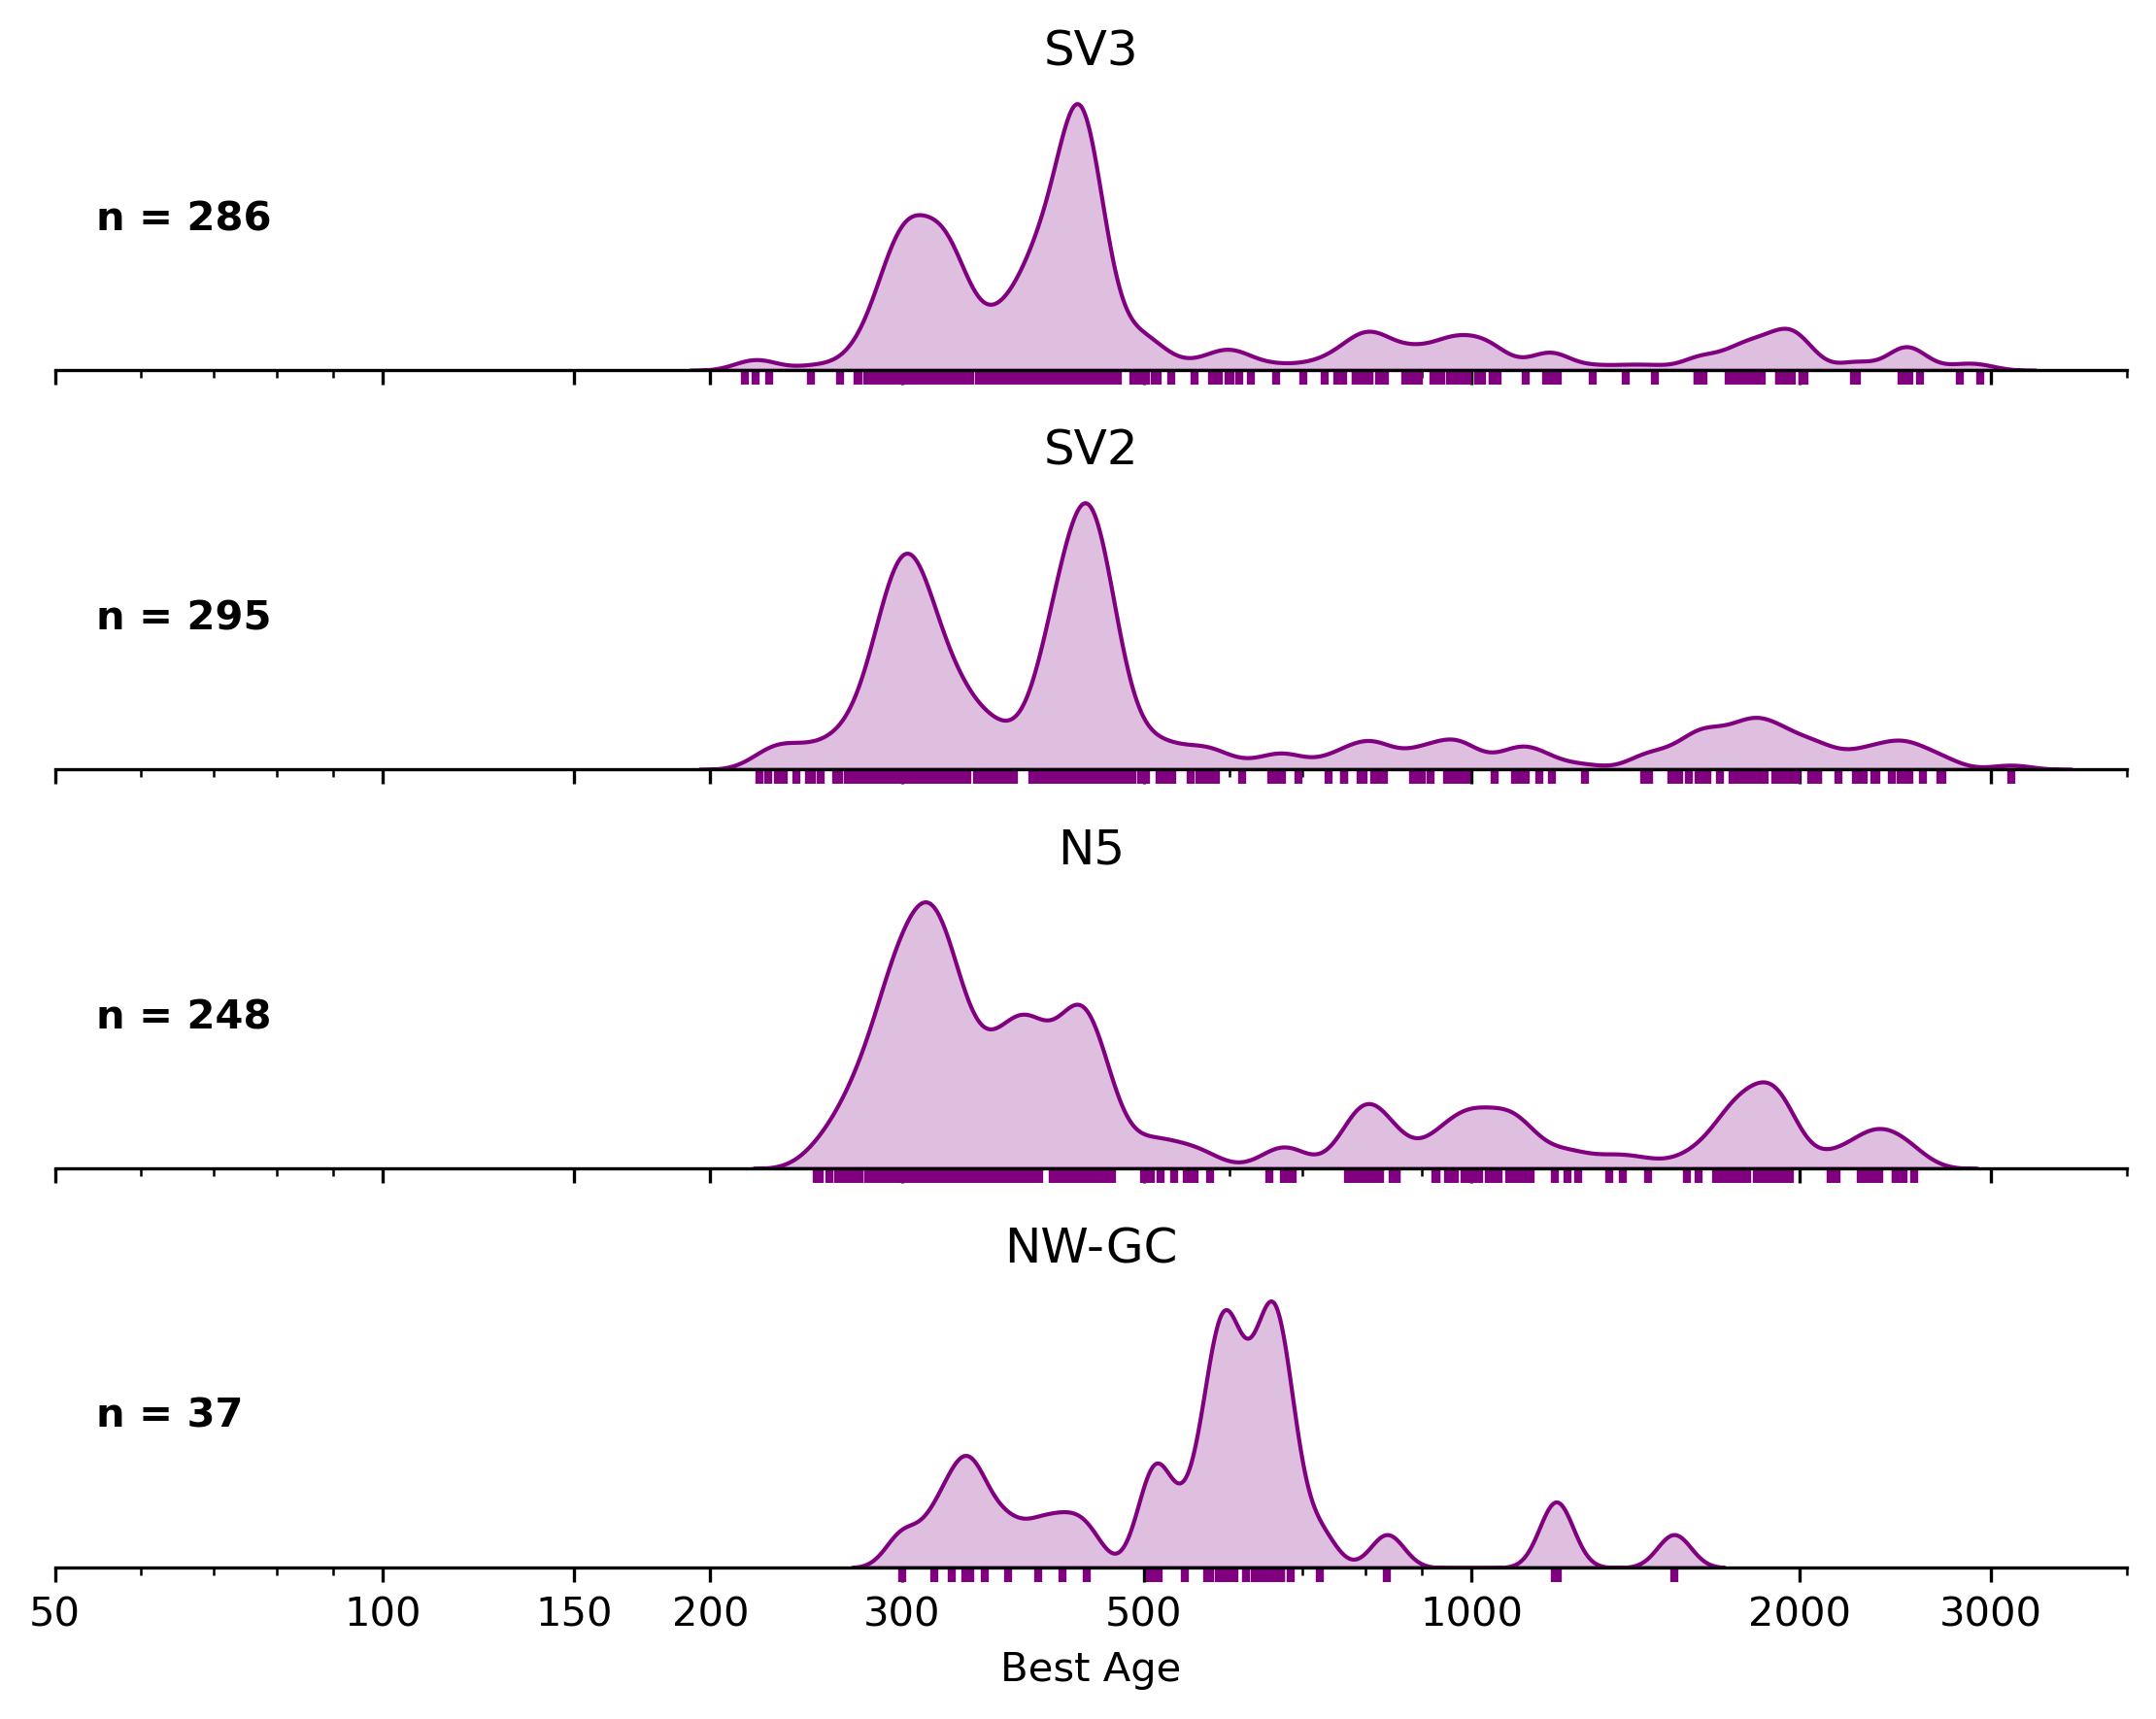

In [10]:
# P-Tr samples
tr1 = [smp for smp in sv_samples if smp.name in ['SV2','SV3']]
tr2 = [smp for smp in samples_published if smp.name in ['N5','NW-GC']]
tr = tr1+tr2

tr.sort(key=lambda x: np.min(x.bestage))

for smp in tr:
    smp.color='purple'
plot_fault_block(tr,save=True,filename='tr.pdf',method=None,mda=False,bw_adjust=0.2,ticks=ticks)

/home/dyvasey/git/dz-caucasus/geoscripts/dz/dz.py:557: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  comp.bestage = pd.Series()
/home/dyvasey/git/dz-caucasus/geoscripts/dz/dz.py:562: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp.bestage = comp.bestage.append(sample.bestage)
/home/dyvasey/git/dz-caucasus/geoscripts/dz/dz.py:562: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp.bestage = comp.bestage.append(sample.bestage)
/home/dyvasey/git/dz-caucasus/geoscripts/dz/dz.py:562: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp.bestage = comp.bestage.append(sample.bestage)
/home/dyvasey/git/dz-caucasus

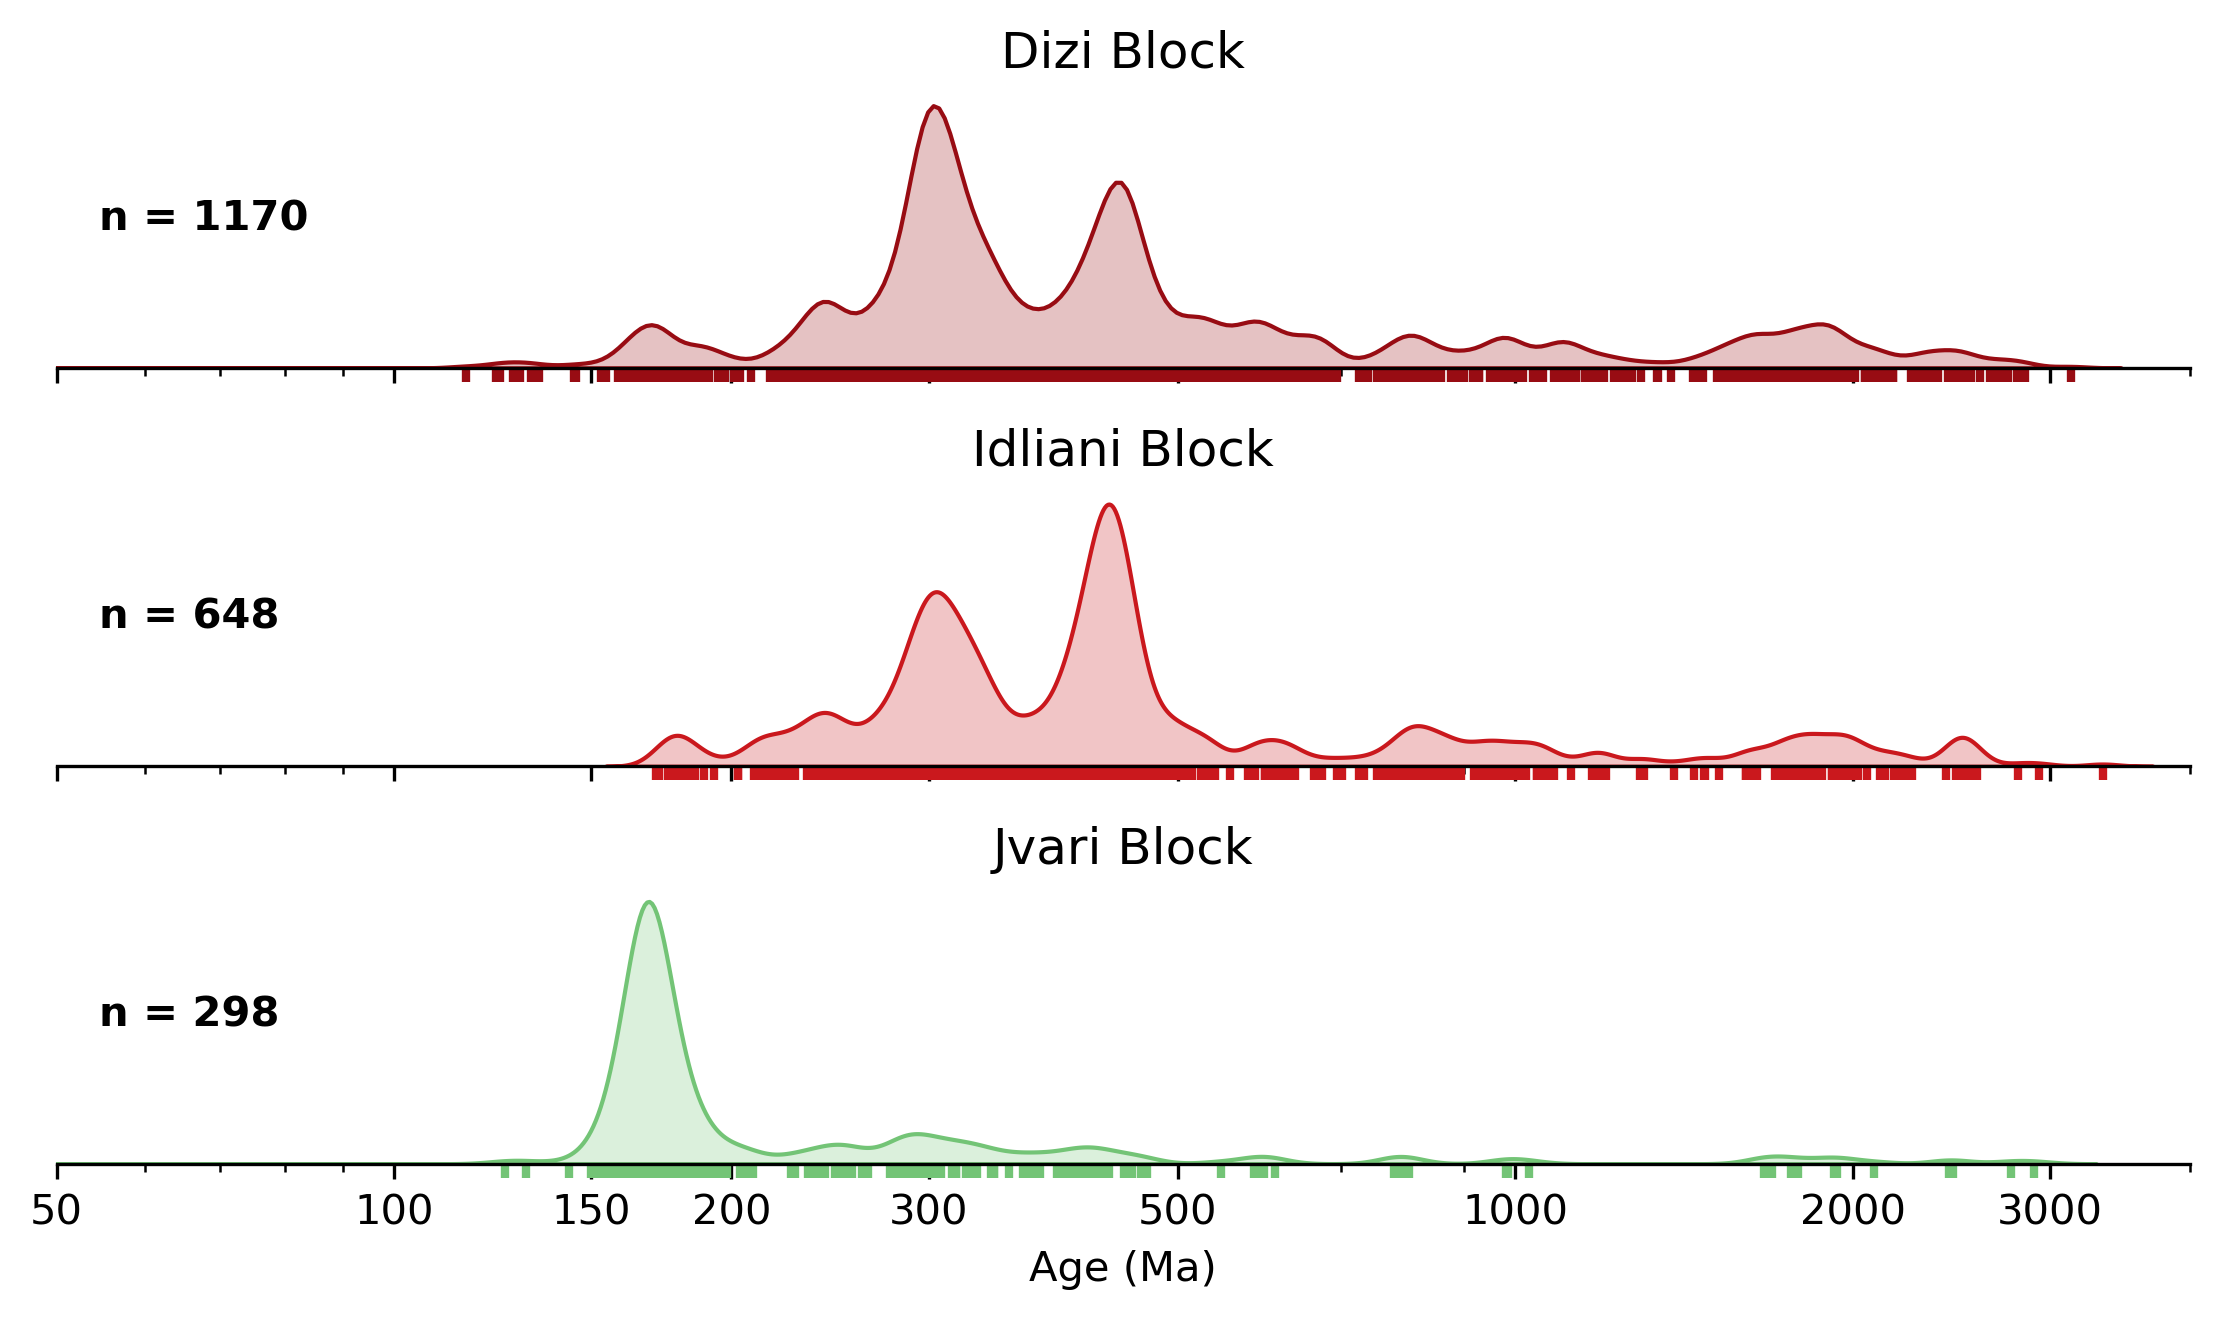

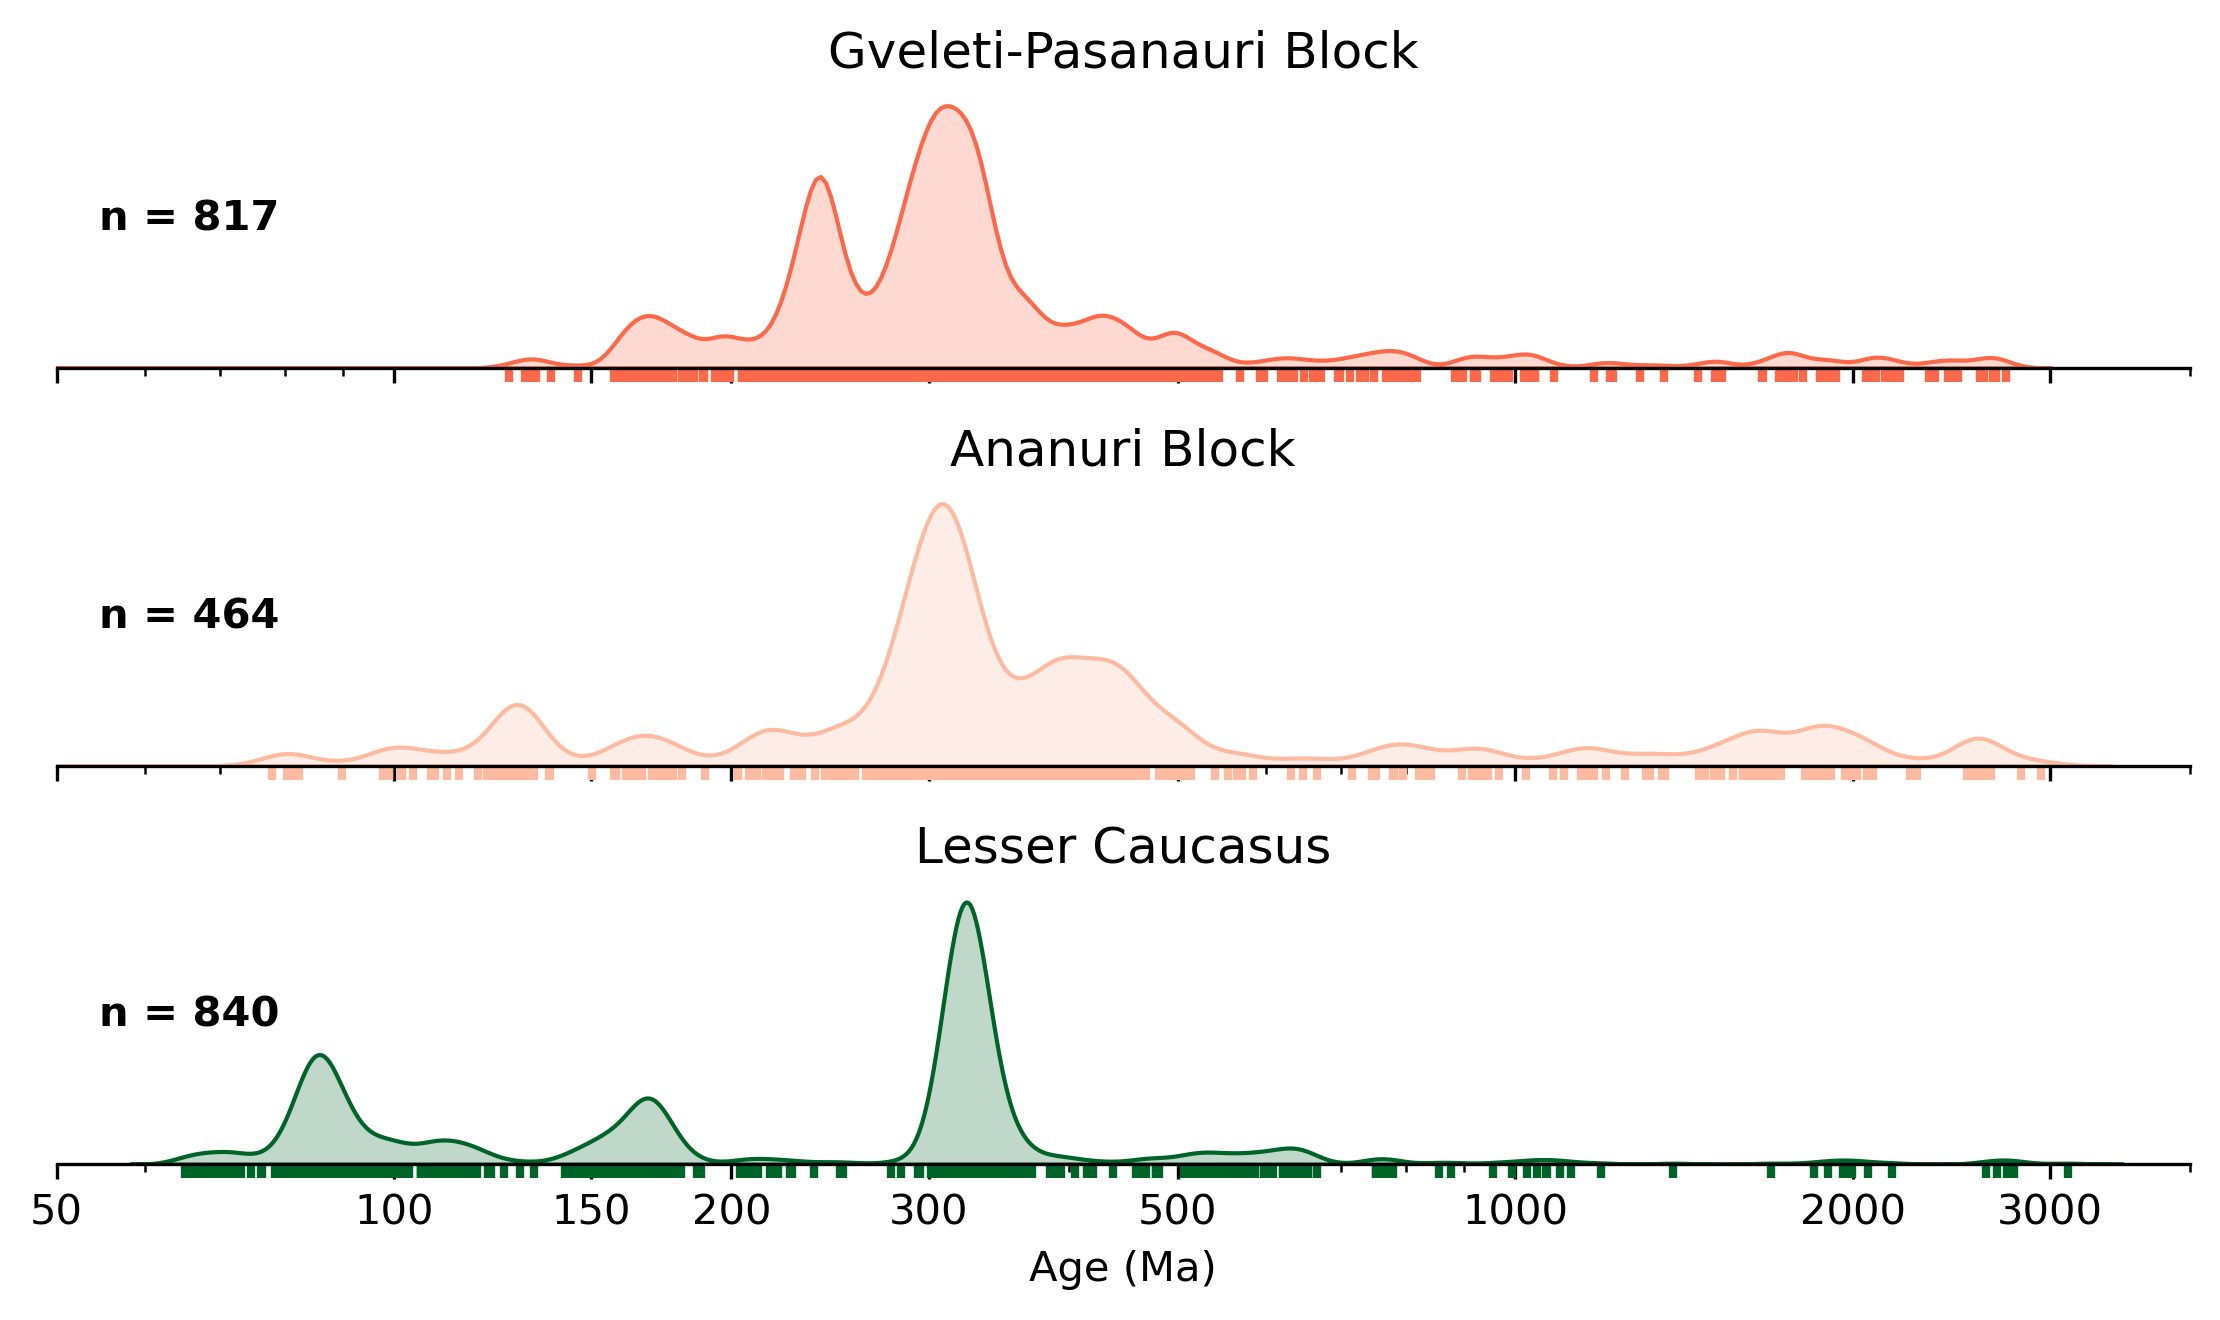

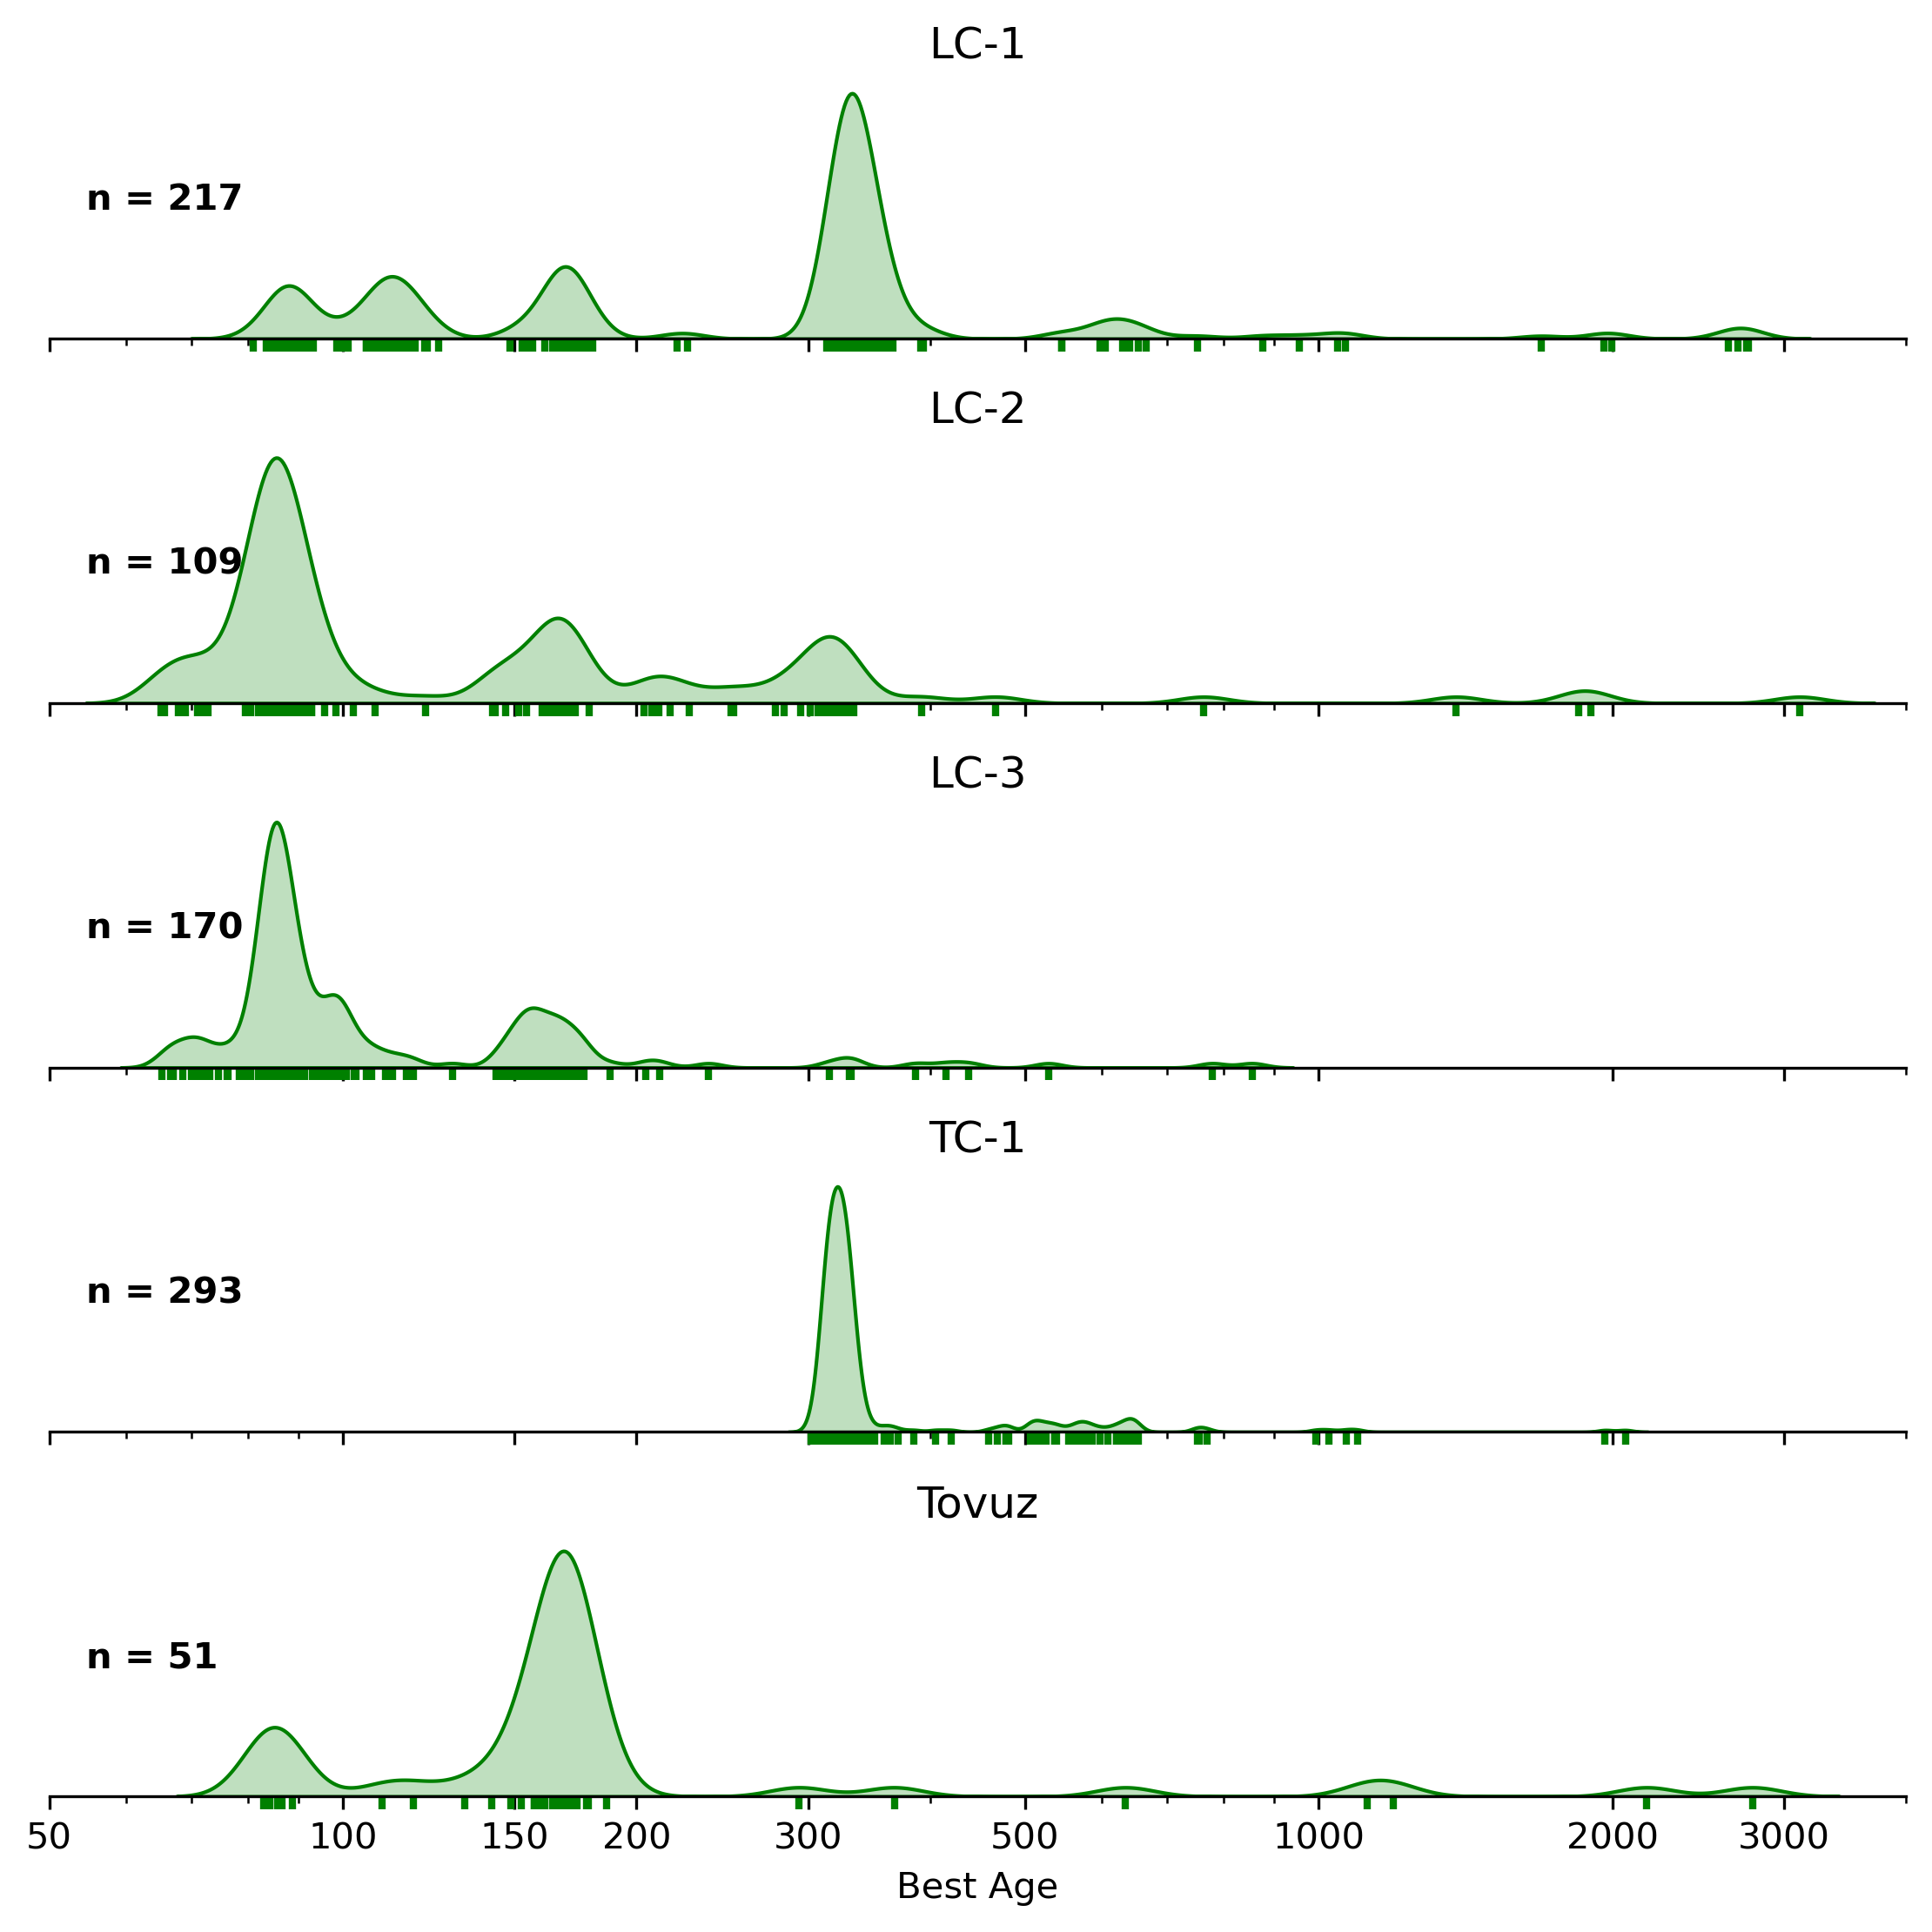

In [42]:
import matplotlib

reds = matplotlib.cm.get_cmap('Reds')
greens = matplotlib.cm.get_cmap('Greens')

color_dict = {dizi:reds(0.9),idliani:reds(0.75),gvpas:reds(0.5),ana:reds(0.25),jvari:greens(0.5),lc:greens(0.9)}

dizi_names = ['NW-GC','N5','Khelra','WGC-2','SV2','SV8','SV7']
idliani_names = ['Khopuri','SV3','SV4']
jvari_names = ['SW-GC','WGC-3','SV6','SV5']
gvpas_names = ['K3','KZ1','KZ2','Tskhradzmula','CGC-1']
ana_names = ['KZ4','KZ3','KZ6','KZ5','CGC-2']

lc_names = ['LC-1','LC-2','LC-3','TC-1','Tovuz']

dizi_smps = [smp for smp in samples if smp.name in dizi_names]
idliani_smps = [smp for smp in samples if smp.name in idliani_names]
jvari_smps = [smp for smp in samples if smp.name in jvari_names]
gvpas_smps = [smp for smp in samples if smp.name in gvpas_names]
ana_smps = [smp for smp in samples if smp.name in ana_names]
lc_smps = [smp for smp in samples if smp.name in lc_names]

for smp in lc_smps:
    smp.color='green'
    smp.bestage = smp.bestage[smp.bestage>65]

lc_smps.sort(key=lambda x: x.name)

dizi = dz.composite(dizi_smps,name='Dizi Block')
idliani = dz.composite(idliani_smps,name='Idliani Block')
jvari = dz.composite(jvari_smps,name='Jvari Block')
gvpas = dz.composite(gvpas_smps,name='Gveleti-Pasanauri Block')
ana = dz.composite(ana_smps,name='Ananuri Block')
lc = dz.composite(lc_smps,name='Lesser Caucasus')

color_dict = {dizi:reds(0.9),idliani:reds(0.75),gvpas:reds(0.5),ana:reds(0.25),jvari:greens(0.5),lc:greens(0.9)}

blocks1 = [dizi,idliani,jvari]
blocks2 = [gvpas,ana,lc]
allblocks = blocks1+blocks2

for block in allblocks:
    block.color=color_dict[block]

plot_fault_block(blocks1,save=True,filename='sv_blocks.pdf',method=None,mda=False,bw_adjust=0.2,ticks=ticks)
plot_fault_block(blocks2,save=True,filename='kz_blocks.pdf',method=None,mda=False,bw_adjust=0.2,ticks=ticks)
plot_fault_block(lc_smps,save=True,filename='lc.pdf',method=None,mda=False,bw_adjust=0.2,ticks=ticks)


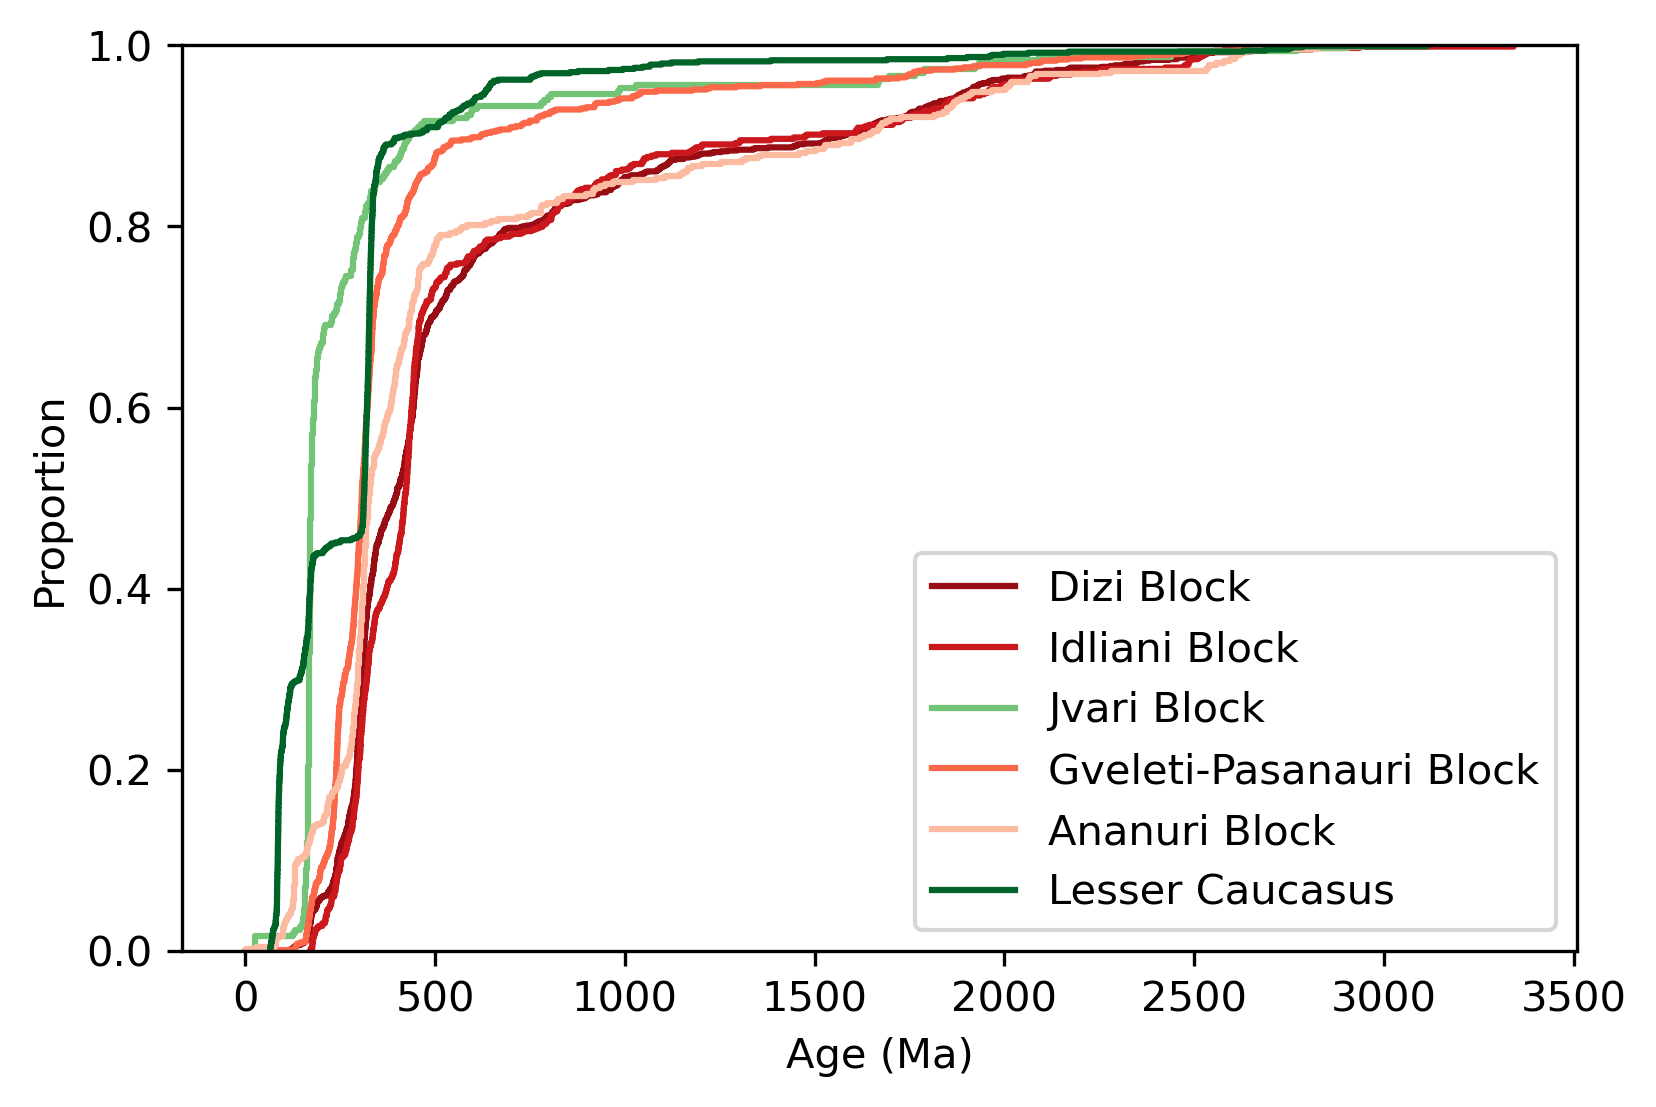

In [43]:
fig,ax = plt.subplots(1,dpi=300)
for smp in allblocks:
    smp.cad(ax=ax,color=color_dict[smp])

plt.legend()

fig.savefig('cad.pdf')
    